<a href="https://colab.research.google.com/github/KeyvanDiba/Master/blob/main/Waveform_Plotting_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from obspy.core import read
singlechannel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(singlechannel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


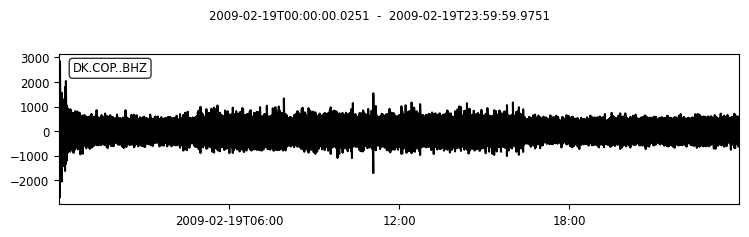

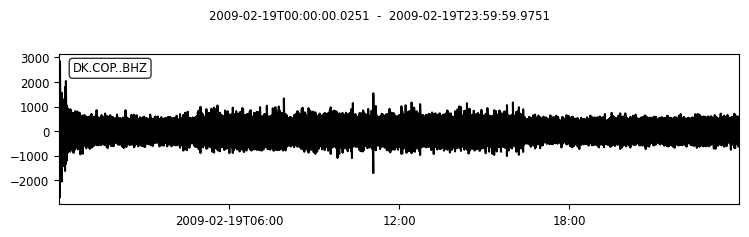

In [22]:
#basic plotting
singlechannel.plot()

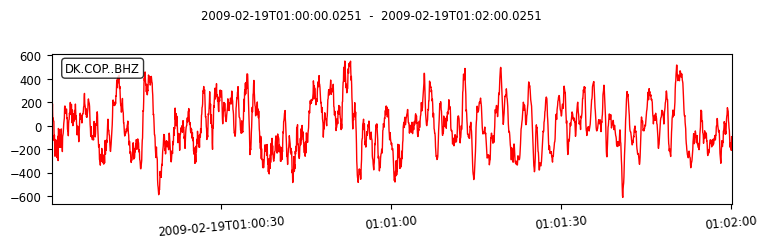

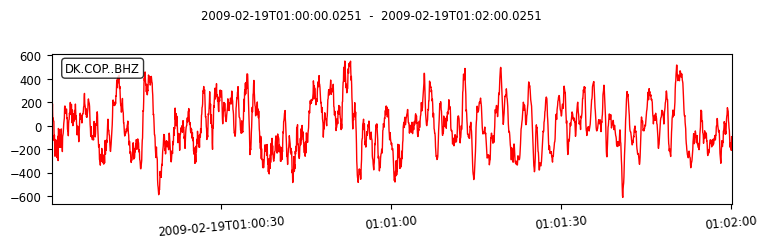

In [23]:
#customized plot
dt = singlechannel[0].stats.starttime
singlechannel.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt + 60*60, endtime=dt + 60*60 + 120)

In [ ]:
#saving plot
#singlechannel.plot(outfile='singlechannel.png')

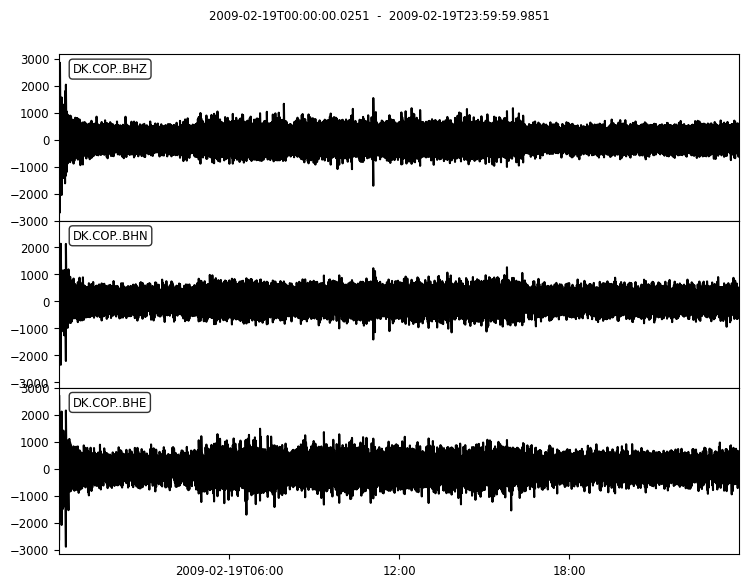

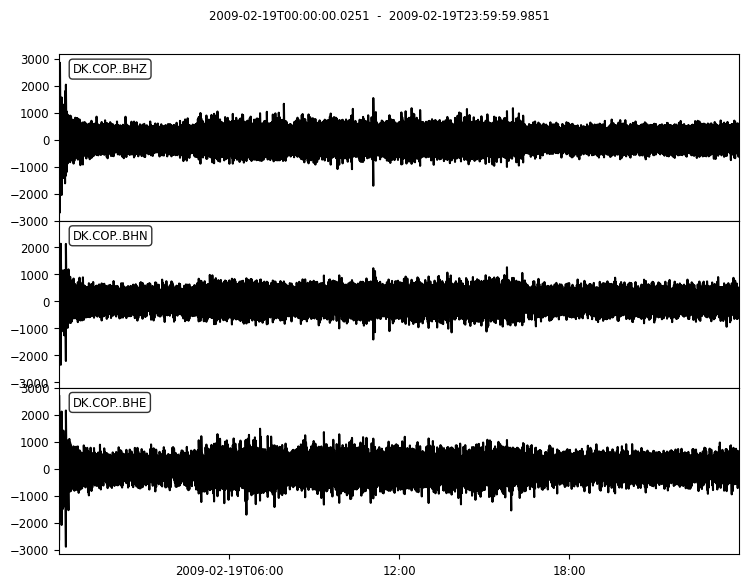

In [26]:
#plotting multiple channels
threechannels = obspy.read('https://examples.obspy.org/COP.BHE.DK.2009.050')
threechannels += obspy.read('https://examples.obspy.org/COP.BHN.DK.2009.050')
threechannels += obspy.read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
threechannels.plot(size=(800, 600))

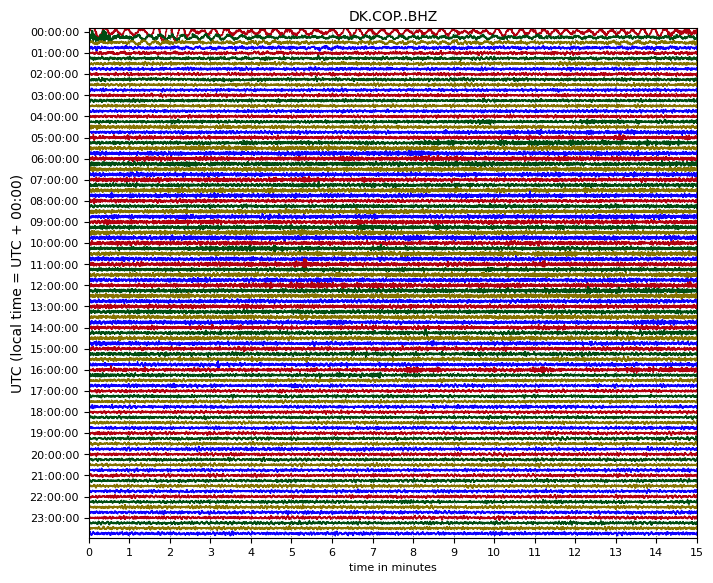

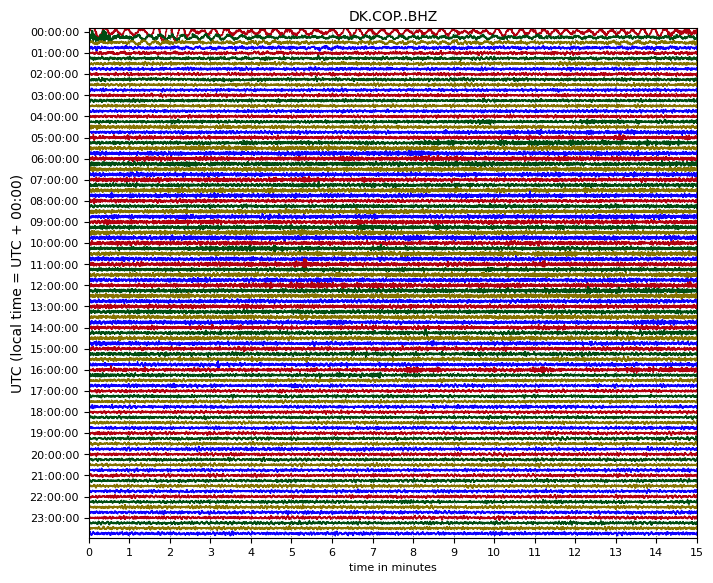

In [27]:
#one day plot
singlechannel.plot(type='dayplot')

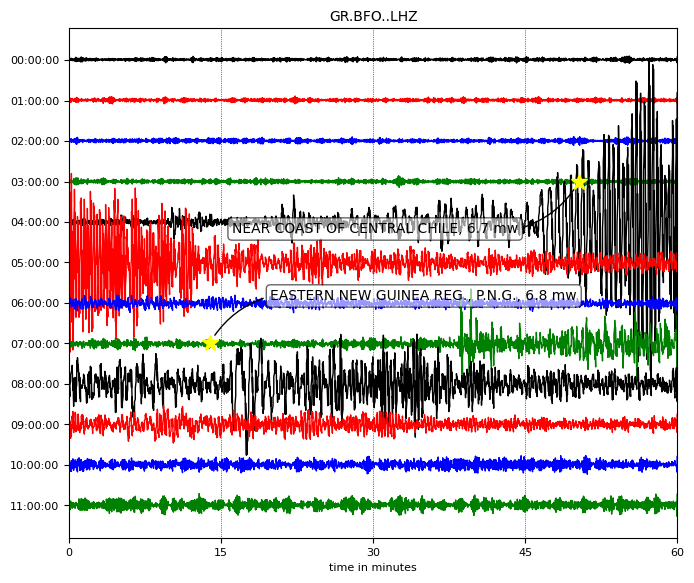

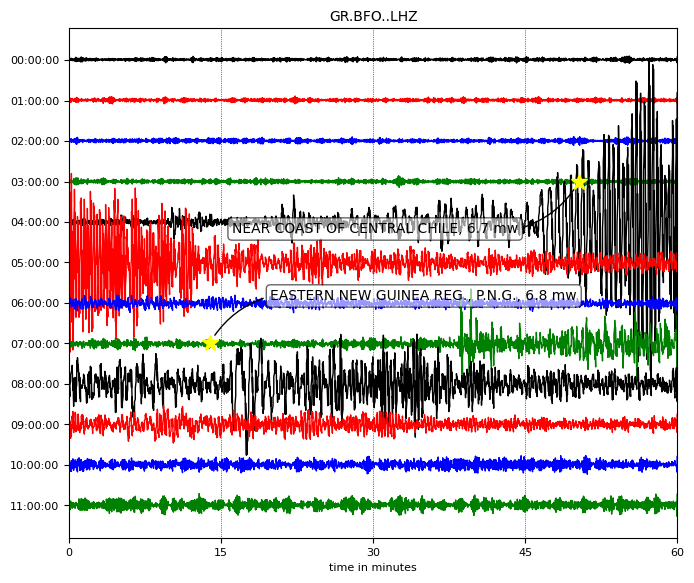

In [28]:
from obspy import read
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2)
st.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e3, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

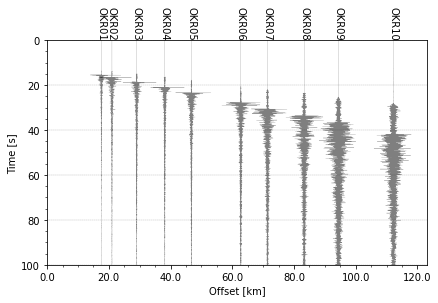

In [30]:
#plotting record section
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy import read, Stream
from obspy.geodetics import gps2dist_azimuth


host = 'https://examples.obspy.org/'
# Files (fmt: SAC)
files = ['TOK.2011.328.21.10.54.OKR01.HHN.inv',
         'TOK.2011.328.21.10.54.OKR02.HHN.inv',
         'TOK.2011.328.21.10.54.OKR03.HHN.inv',
         'TOK.2011.328.21.10.54.OKR04.HHN.inv',
         'TOK.2011.328.21.10.54.OKR05.HHN.inv',
         'TOK.2011.328.21.10.54.OKR06.HHN.inv',
         'TOK.2011.328.21.10.54.OKR07.HHN.inv',
         'TOK.2011.328.21.10.54.OKR08.HHN.inv',
         'TOK.2011.328.21.10.54.OKR09.HHN.inv',
         'TOK.2011.328.21.10.54.OKR10.HHN.inv']
# Earthquakes' epicenter
eq_lat = 35.565
eq_lon = -96.792

# Reading the waveforms
st = Stream()
for waveform in files:
    st += read(host + waveform)

# Calculating distance from SAC headers lat/lon
# (trace.stats.sac.stla and trace.stats.sac.stlo)
for tr in st:
    tr.stats.distance = gps2dist_azimuth(tr.stats.sac.stla, tr.stats.sac.stlo,
                                         eq_lat, eq_lon)[0]
    # Setting Network name for plot title
    tr.stats.network = 'TOK'

st.filter('bandpass', freqmin=0.1, freqmax=10)

# Do the section plot..
# If no customization is done after the section plot command, figure
# initialization can be left out and also option ".., show=False, fig=fig)" can
# be omitted, and figure is shown automatically
fig = plt.figure()
st.plot(type='section', plot_dx=20e3, recordlength=100,
        time_down=True, linewidth=.25, grid_linewidth=.25, show=False, fig=fig)

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
plt.show()


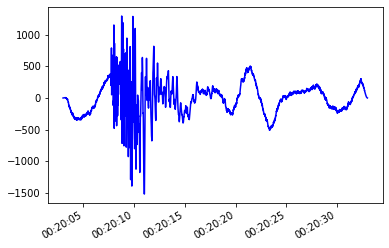

In [31]:
#custom plot
import matplotlib.pyplot as plt
from obspy import read

st = read()
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()